##**3. Import Libraries and Load Data**

In [5]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns

 #Loadthedataset
 df=pd.read_csv('https://raw.githubusercontent.com/anmoljaincma/project_4_internship_unified_mentor/refs/heads/main/daily_transactions_raw_file.csv')

 #Displaythefirst fewrowsof thedataset
 df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


##**4. Data Cleaning**

● Handle missing values.  
● Correct data types.  
● Remove duplicates.

In [6]:
# Inspect unique date formats before conversion
print("Unique date formats before conversion:")
print(df['Date'].head(20))

# Function to standardize date formats
def standardize_date(date_str):
    try:
        # Try parsing as dd/mm/yyyy HH:MM:SS (with time)
        if ' ' in str(date_str):
            return pd.to_datetime(date_str, format='%d/%m/%Y %H:%M:%S').strftime('%d/%m/%Y')
        # Try parsing as d/m/y or dd/mm/yyyy (without time)
        else:
            # Handle d/m/y or dd/mm/yyyy
            return pd.to_datetime(date_str, dayfirst=True).strftime('%d/%m/%Y')
    except (ValueError, TypeError):
        return pd.NaT

# Apply date standardization
df['Date'] = df['Date'].apply(standardize_date)

# Drop rows with missing (unparseable) dates
df.dropna(subset=['Date'], inplace=True)

# Convert Date to datetime with consistent format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Handle missing values in Subcategory and Note
df['Subcategory'].fillna('Unknown', inplace=True)
df['Note'].fillna('No Note', inplace=True)

# Correct data types
df['Amount'] = df['Amount'].astype(float)
df['Income/Expense'] = df['Income/Expense'].str.capitalize()
df['Mode'] = df['Mode'].str.strip()
df['Category'] = df['Category'].str.strip()
df['Subcategory'] = df['Subcategory'].str.strip()

# Remove duplicates
df.drop_duplicates(inplace=True)

# Validate currency (should all be INR)
if not all(df['Currency'] == 'INR'):
    df = df[df['Currency'] == 'INR']

# Handle outliers (optional: capping extreme amounts)
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Amount'] = df['Amount'].clip(lower=lower_bound, upper=upper_bound)

# Final verification
print("\nMissing Values after cleaning:")
print(df.isnull().sum())
print("\nData Types:")
print(df.dtypes)
print("\nShape:", df.shape)
print("\nCurrency Check:")
print(df['Currency'].value_counts())
print("\nSample of cleaned dates:")
print(df['Date'].head(10))

# Save the cleaned dataset
df.to_csv('cleaned_daily_transactions.csv', index=False)

Unique date formats before conversion:
0     20/09/2018 12:04:08
1     20/09/2018 12:03:15
2              19/09/2018
3     17/09/2018 23:41:17
4     16/09/2018 17:15:08
5     15/09/2018 06:34:17
6     14/09/2018 05:39:17
7     13/09/2018 21:35:15
8     13/09/2018 21:01:47
9     13/09/2018 21:01:32
10             13/09/2018
11             13/09/2018
12              12/9/2018
13              11/9/2018
14              11/9/2018
15              11/9/2018
16              10/9/2018
17               8/9/2018
18               7/9/2018
19               7/9/2018
Name: Date, dtype: object

Missing Values after cleaning:
Date              0
Mode              0
Category          0
Subcategory       0
Note              0
Amount            0
Income/Expense    0
Currency          0
dtype: int64

Data Types:
Date              datetime64[ns]
Mode                      object
Category                  object
Subcategory               object
Note                      object
Amount                   float64

/tmp/ipython-input-1444186963.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Subcategory'].fillna('Unknown', inplace=True)
/tmp/ipython-input-1444186963.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [7]:
df.head(20)

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,2018-09-20,Cash,Transportation,Train,2 Place 5 to Place 0,30.00,Expense,INR
1,2018-09-20,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.00,Expense,INR
2,2018-09-19,Saving Bank account 1,subscription,Netflix,1 month subscription,199.00,Expense,INR
3,2018-09-17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.00,Expense,INR
4,2018-09-16,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.00,Expense,INR
5,2018-09-15,Credit Card,subscription,Tata Sky,Permanent Residence - Tata Play recharge,200.00,Expense,INR
6,2018-09-14,Cash,Transportation,auto,Place 2 station to Permanent Residence,50.00,Expense,INR
7,2018-09-13,Saving Bank account 1,Transportation,Train,2 Place 0 to Place 3,40.00,Expense,INR
8,2018-09-13,Credit Card,Other,Unknown,HBR 2 Months subscription,83.00,Expense,INR
9,2018-09-13,Cash,Food,Grocery,1kg atta,46.00,Expense,INR


##**4. Exploratory Data Analysis (EDA)**

- Summary Statistics (numeric overview)

- Distribution of transaction amounts

- Transaction counts by category & type (Income/Expense)



Summary Statistics for Numeric Columns:
count    2450.000000
mean      469.833947
std       652.331010
min         2.000000
25%        35.000000
50%       100.000000
75%       785.500000
max      1911.250000
Name: Amount, dtype: float64


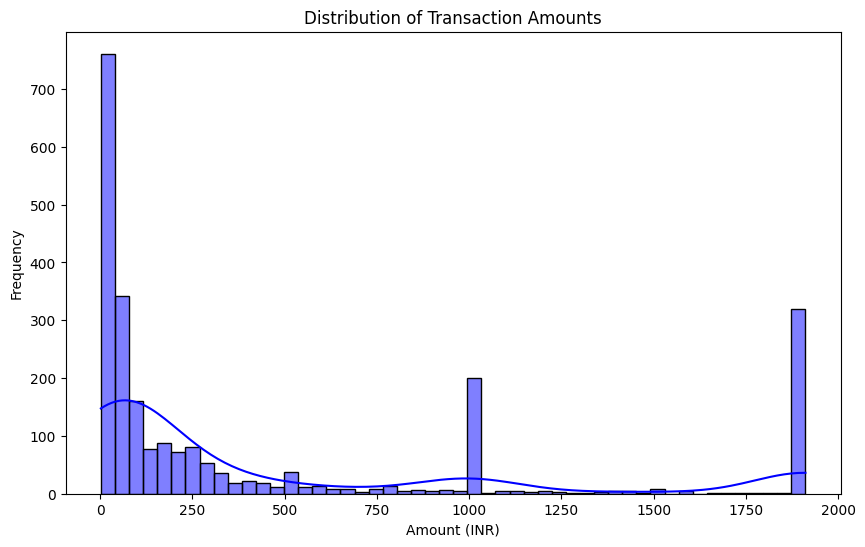

/tmp/ipython-input-406404672.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')


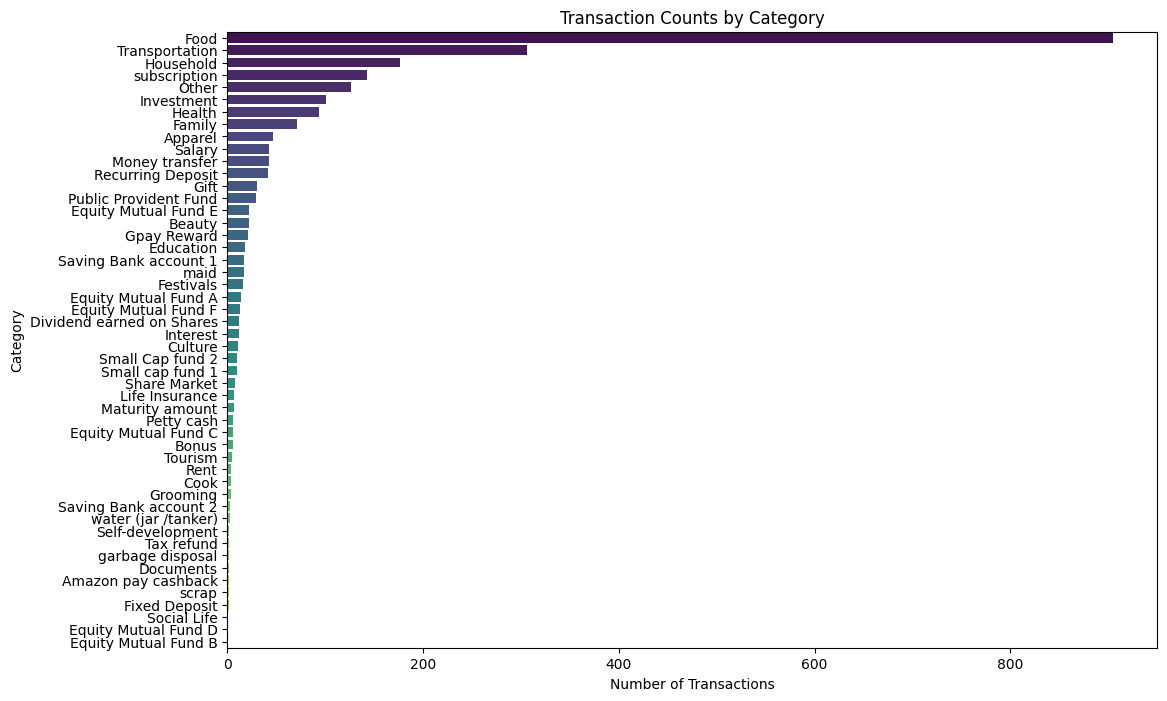

/tmp/ipython-input-406404672.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_expense_counts.index, y=income_expense_counts.values, palette='magma')


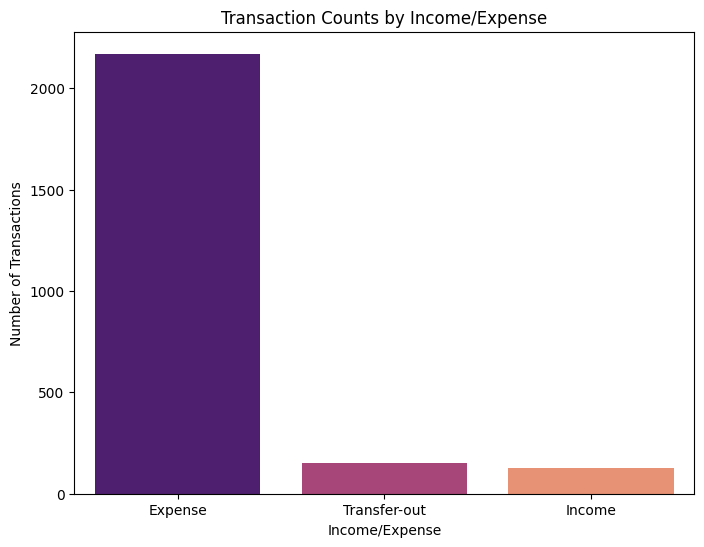

<Figure size 1400x800 with 0 Axes>

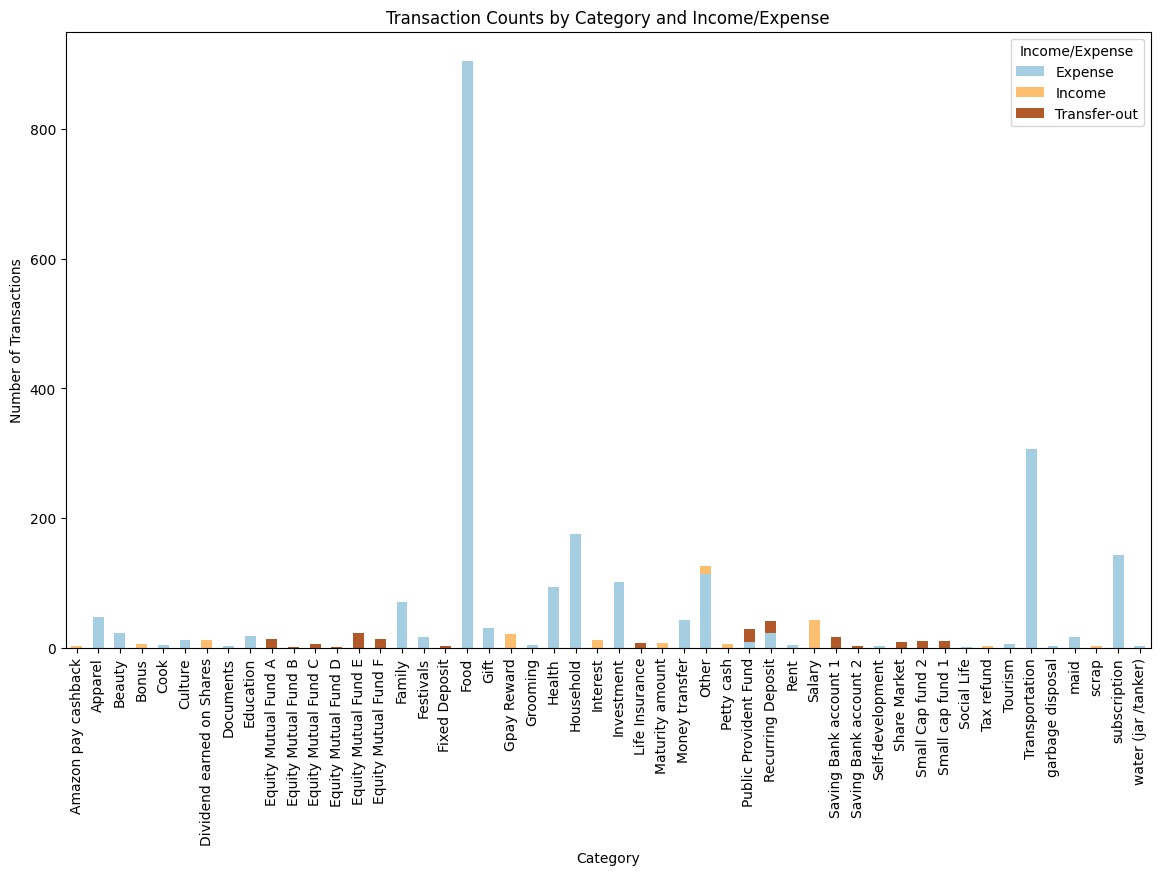

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('cleaned_daily_transactions.csv')

# Convert Date to datetime, handling YYYY-MM-DD format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Step 1: Summary Statistics
print("Summary Statistics for Numeric Columns:")
print(df['Amount'].describe())

# Step 2: Distribution of Transaction Amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount (INR)')
plt.ylabel('Frequency')
plt.savefig('transaction_amount_distribution.png')
plt.show()

# Step 3: Transaction Counts by Category
plt.figure(figsize=(12, 8))
category_counts = df['Category'].value_counts()
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title('Transaction Counts by Category')
plt.xlabel('Number of Transactions')
plt.ylabel('Category')
plt.savefig('transaction_counts_by_category.png')
plt.show()

# Step 4: Transaction Counts by Income/Expense
plt.figure(figsize=(8, 6))
income_expense_counts = df['Income/Expense'].value_counts()
sns.barplot(x=income_expense_counts.index, y=income_expense_counts.values, palette='magma')
plt.title('Transaction Counts by Income/Expense')
plt.xlabel('Income/Expense')
plt.ylabel('Number of Transactions')
plt.savefig('transaction_counts_by_income_expense.png')
plt.show()

# Step 5: Transaction Counts by Category and Income/Expense
plt.figure(figsize=(14, 8))
category_income_expense = df.groupby(['Category', 'Income/Expense']).size().unstack(fill_value=0)
category_income_expense.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Paired')
plt.title('Transaction Counts by Category and Income/Expense')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.legend(title='Income/Expense')
plt.savefig('transaction_counts_by_category_income_expense.png')
plt.show()

# Prepare data for Chart.js bar chart (Total Expenses by Category)
expense_df = df[df['Income/Expense'] == 'Expense']
category_sums = expense_df.groupby('Category')['Amount'].sum().reset_index()
category_sums = category_sums.sort_values('Amount', ascending=False)  # Sort for better visualization

Let's analyze the summary statistics for the 'Amount' column:

- **count:** There are 2450 transactions in the dataset after cleaning.
- **mean:** The average transaction amount is approximately **469.83 INR**.
- **std:** The standard deviation is about **652.33 INR**, which is quite high relative to the mean. This indicates a **wide spread in the transaction amounts**, suggesting there's a significant variation between the smallest and largest transactions.
- **min:** The smallest transaction amount is **2.00 INR**.
- **25% (Q1):** 25% of the transactions are for amounts less than or equal to **35.00 INR**.
- **50% (Median):** The median transaction amount is **100.00 INR**. This is much lower than the mean, further supporting the observation from the histogram that there are many small transactions and fewer larger ones that pull the mean up.
- **75% (Q3):** 75% of the transactions are for amounts less than or equal to **785.50 INR**.
- **max:** The maximum transaction amount after outlier handling (capping) is **1911.25 INR**.

In summary, the statistics confirm that the data contains a large number of small transactions, with a few larger transactions contributing to a higher mean and standard deviation. The **median provides a better representation** of a typical transaction amount than the mean in this skewed distribution.

Based on the graphs generated in the output, here is an analysis of the data:

- **Distribution of Transaction Amounts:** The histogram shows that the majority of transactions are for smaller amounts, with a **peak around INR 0-200**. There are also peaks around INR 1000 and INR 1800-2000, indicating some larger transactions, possibly outliers or specific types of expenses/income. The distribution is **right-skewed**, which is typical for transaction data.

- **Transaction Counts by Category:** This bar plot shows the frequency of transactions for each category. **'Food' and 'Transportation'** are the most frequent transaction categories, followed by 'Household' and 'subscription'. This indicates that daily expenses related to food and travel are the most common types of transactions.

- **Transaction Counts by Income/Expense:** This bar plot clearly shows that the number of **'Expense'** transactions is significantly higher than 'Income' and 'Transfer-out' transactions. This is **expected in a daily household transaction** dataset, as expenses tend to be more frequent than income events or transfers.

- **Transaction Counts by Category and Income/Expense:** This stacked bar chart provides a breakdown of transaction counts by both category and income/expense type. It allows us to see which categories are primarily associated with expenses, income, or transfers. For example, **'Food' and 'Transportation'** are almost entirely **expenses**, while **'Salary' and 'From Family'** are mainly **income**. Categories **like 'Small Cap fund' and 'Equity Mutual Fund'** show a **mix of income and transfer-out** transactions.


##**5. Time Series Analysis**

● Trend analysis.  
● Monthly and daily trends.

Daily Total Amounts (INR):
Income/Expense  Expense  Income  Transfer-out
Date                                         
2015-01-01       952.00     0.0           0.0
2015-01-02      2015.25     0.0           0.0
2015-01-03       622.00     0.0           0.0
2015-01-04      2141.25     0.0           0.0
2015-01-05      4290.50     0.0           0.0
2015-01-06        30.00     0.0           0.0
2015-01-07        31.00     0.0           0.0
2015-01-08        20.00     0.0           0.0
2015-01-09       670.00     0.0           0.0
2015-01-10       770.00     0.0           0.0


<Figure size 1400x600 with 0 Axes>

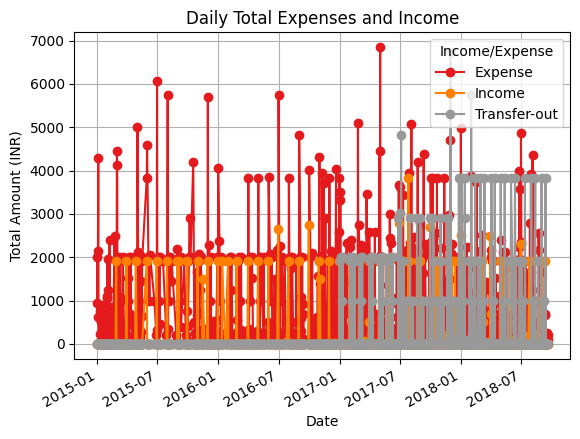


Daily Transaction Counts:
Income/Expense  Expense  Income  Transfer-out
Date                                         
2015-01-01           11       0             0
2015-01-02            4       0             0
2015-01-03            3       0             0
2015-01-04            4       0             0
2015-01-05            4       0             0
2015-01-06            2       0             0
2015-01-07            1       0             0
2015-01-08            1       0             0
2015-01-09            2       0             0
2015-01-10            4       0             0


<Figure size 1400x600 with 0 Axes>

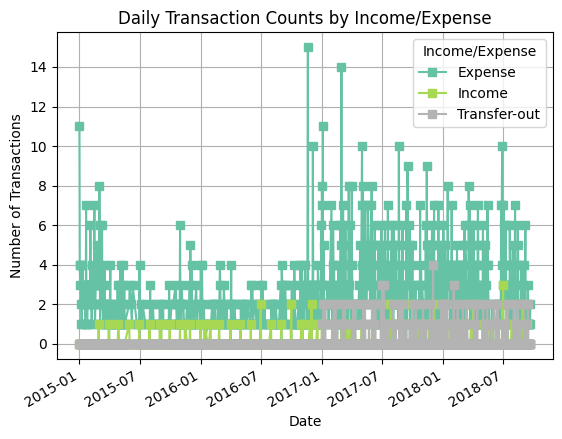

/tmp/ipython-input-691888474.py:38: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_totals = df.groupby([pd.Grouper(freq='M'), 'Income/Expense'])['Amount'].sum().unstack(fill_value=0)



Monthly Total Amounts (INR):
Income/Expense   Expense   Income  Transfer-out
Date                                           
2015-01-31      16432.00     0.00          0.00
2015-02-28      12523.75  1911.25          0.00
2015-03-31      20743.40  1911.25          0.00
2015-04-30      13044.50  1911.25          0.00
2015-05-31      20914.50  1911.25          0.00
2015-06-30      10846.50  1911.25          0.00
2015-07-31      13948.00  1911.25          0.00
2015-08-31      16897.25  1911.25          0.00
2015-09-30      10300.50  3822.50          0.00
2015-10-31      17921.75  1911.25          0.00
2015-11-30      10281.50  3411.25          0.00
2015-12-31      15763.75  1911.25          0.00
2016-01-31      14086.00  3822.50          0.00
2016-02-29      10843.50  1911.25          0.00
2016-03-31       8542.25  1911.25          0.00
2016-04-30      12282.50  1911.25          0.00
2016-05-31      12756.75  1911.25          0.00
2016-06-30      14547.65  2651.25          0.00
2016-07-31

<Figure size 1200x600 with 0 Axes>

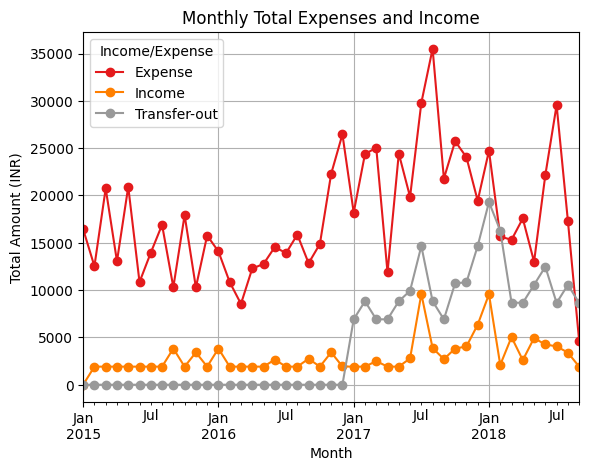

/tmp/ipython-input-691888474.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df.groupby([pd.Grouper(freq='M'), 'Income/Expense']).size().unstack(fill_value=0)



Monthly Transaction Counts:
Income/Expense  Expense  Income  Transfer-out
Date                                         
2015-01-31           79       0             0
2015-02-28           64       1             0
2015-03-31           60       1             0
2015-04-30           23       1             0
2015-05-31           32       1             0
2015-06-30           11       1             0
2015-07-31           13       1             0
2015-08-31           15       1             0
2015-09-30           14       2             0
2015-10-31           29       1             0
2015-11-30           20       2             0
2015-12-31           28       1             0
2016-01-31           18       2             0
2016-02-29           23       1             0
2016-03-31           18       1             0
2016-04-30           20       1             0
2016-05-31           19       1             0
2016-06-30           20       2             0
2016-07-31           15       1             0
2016-

<Figure size 1200x600 with 0 Axes>

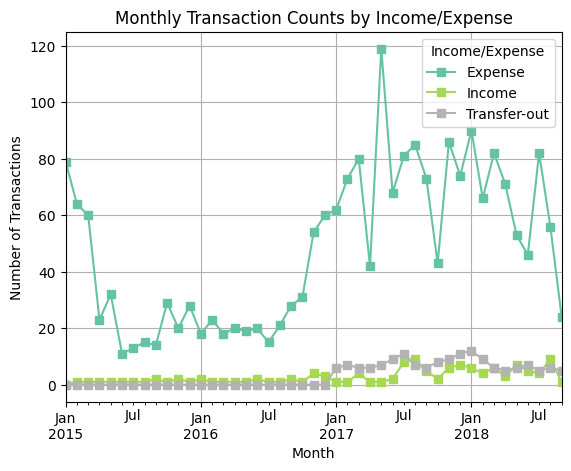


Weekly Total Expenses (INR):
Date
2015-01-04     5730.50
2015-01-11     6031.50
2015-01-18     2091.00
2015-01-25      924.00
2015-02-01     2713.00
2015-02-08     6405.50
2015-02-15     1459.00
2015-02-22      645.00
2015-03-01     3150.25
2015-03-08    11681.75
Freq: W-SUN, Name: Amount, dtype: float64


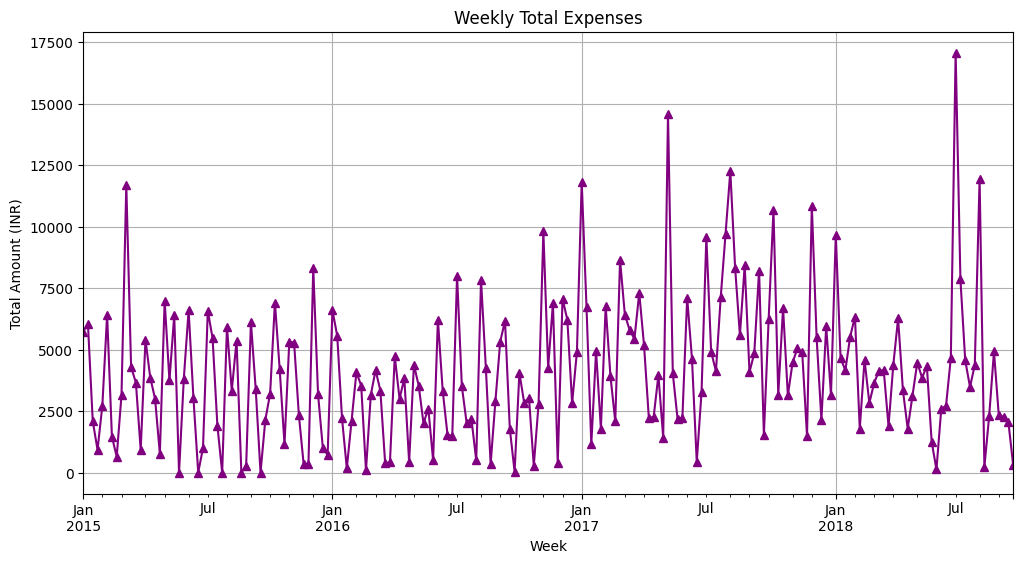

In [9]:
# Convert Date to datetime (necessary for time-series analysis)
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Set Date as index for easier time-series operations
df.set_index('Date', inplace=True)

# Step 1: Daily Total Expenses and Income
daily_totals = df.groupby([pd.Grouper(freq='D'), 'Income/Expense'])['Amount'].sum().unstack(fill_value=0)
print("Daily Total Amounts (INR):")
print(daily_totals.head(10))

plt.figure(figsize=(14, 6))
daily_totals.plot(kind='line', marker='o', colormap='Set1')
plt.title('Daily Total Expenses and Income')
plt.xlabel('Date')
plt.ylabel('Total Amount (INR)')
plt.legend(title='Income/Expense')
plt.grid(True)
plt.savefig('daily_totals_trend.png')
plt.show()

# Step 2: Daily Transaction Counts
daily_counts = df.groupby([pd.Grouper(freq='D'), 'Income/Expense']).size().unstack(fill_value=0)
print("\nDaily Transaction Counts:")
print(daily_counts.head(10))

plt.figure(figsize=(14, 6))
daily_counts.plot(kind='line', marker='s', colormap='Set2')
plt.title('Daily Transaction Counts by Income/Expense')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.legend(title='Income/Expense')
plt.grid(True)
plt.savefig('daily_counts_trend.png')
plt.show()

# Step 3: Monthly Total Expenses and Income
monthly_totals = df.groupby([pd.Grouper(freq='M'), 'Income/Expense'])['Amount'].sum().unstack(fill_value=0)
print("\nMonthly Total Amounts (INR):")
print(monthly_totals)

plt.figure(figsize=(12, 6))
monthly_totals.plot(kind='line', marker='o', colormap='Set1')
plt.title('Monthly Total Expenses and Income')
plt.xlabel('Month')
plt.ylabel('Total Amount (INR)')
plt.legend(title='Income/Expense')
plt.grid(True)
plt.savefig('monthly_totals_trend.png')
plt.show()

# Step 4: Monthly Transaction Counts
monthly_counts = df.groupby([pd.Grouper(freq='M'), 'Income/Expense']).size().unstack(fill_value=0)
print("\nMonthly Transaction Counts:")
print(monthly_counts)

plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='line', marker='s', colormap='Set2')
plt.title('Monthly Transaction Counts by Income/Expense')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.legend(title='Income/Expense')
plt.grid(True)
plt.savefig('monthly_counts_trend.png')
plt.show()

# Step 5: Weekly Expense Trends
expense_df = df[df['Income/Expense'] == 'Expense']
weekly_expenses = expense_df.groupby(pd.Grouper(freq='W'))['Amount'].sum()
print("\nWeekly Total Expenses (INR):")
print(weekly_expenses.head(10))

plt.figure(figsize=(12, 6))
weekly_expenses.plot(kind='line', marker='^', color='purple')
plt.title('Weekly Total Expenses')
plt.xlabel('Week')
plt.ylabel('Total Amount (INR)')
plt.grid(True)
plt.savefig('weekly_expenses_trend.png')
plt.show()

Now, let's analyze the output from the time series analysis:

- **Daily Total Expenses and Income:** The daily totals plot shows **significant fluctuations** in both expenses and income/transfer-out amounts on a day-to-day basis. **Expenses** are consistently higher than income and transfer-out amounts. There are **noticeable peaks** in expenses, indicating days with unusually high spending.

- **Daily Transaction Counts by Income/Expense:** This plot shows the number of transactions each day. Similar to the daily totals, the number of expense transactions is generally much higher than income or transfer-out transactions. There is a **noticeable increase in the number of transactions around early 2017** and this higher frequency continues throughout the rest of the dataset.

- **Monthly Total Expenses and Income:** The monthly totals plot provides a smoother view of the trends. It shows that monthly expenses fluctuate but generally seem to increase over time, particularly from **2017 onwards**. Monthly income and transfer-out amounts are lower and also show some variability.

- **Monthly Transaction Counts by Income/Expense:** This plot shows the monthly frequency of transactions. The number of monthly expenses is considerably higher than income or transfer-out transactions. Similar to the daily counts, there is a clear **increase in the number of monthly transactions starting in 2017**.

- **Weekly Total Expenses:** This plot highlights the weekly spending patterns. It shows considerable week-to-week variability in total expenses, with **some weeks having significantly higher spending** than others.

## **6. Correlation Analysis**

 ● Analyze the correlation between transaction categories and amounts.

Descriptive Statistics of Amount by Category:
                           count         mean         std      min        25%  \
Category                                                                        
Amazon pay cashback          2.0    11.500000   13.435029     2.00     6.7500   
Apparel                     47.0   410.400426  553.917294    10.00    74.5000   
Beauty                      22.0   186.375000  391.711839    40.00    50.0000   
Bonus                        6.0   504.333333  771.243585     5.00     5.0000   
Cook                         4.0  1566.375000  539.350091   776.00  1444.2500   
Culture                     11.0   391.305455  200.585369    40.00   313.0000   
Dividend earned on Shares   12.0    73.062500   59.529607     6.75    35.8750   
Documents                    2.0    50.000000    0.000000    50.00    50.0000   
Education                   18.0    29.833333   24.679713     3.00    14.0000   
Equity Mutual Fund A        14.0  1065.089286  243.541807  1000

/tmp/ipython-input-115772760.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Amount', data=df, palette='viridis')


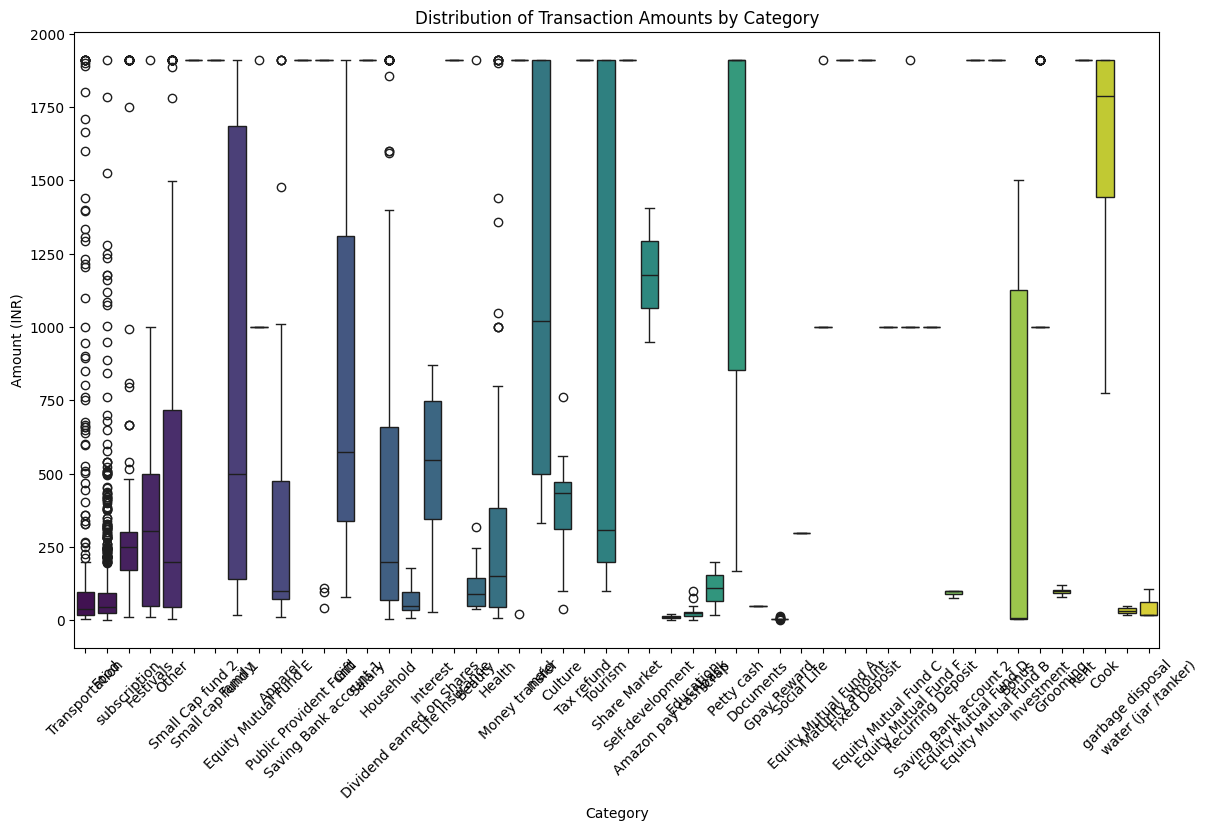


ANOVA Test for Amount across Categories:
F-statistic: 73.99, P-value: 0.0000
Significant difference in Amount across Categories (p < 0.05)


/tmp/ipython-input-115772760.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Amount', data=expense_df, palette='magma')


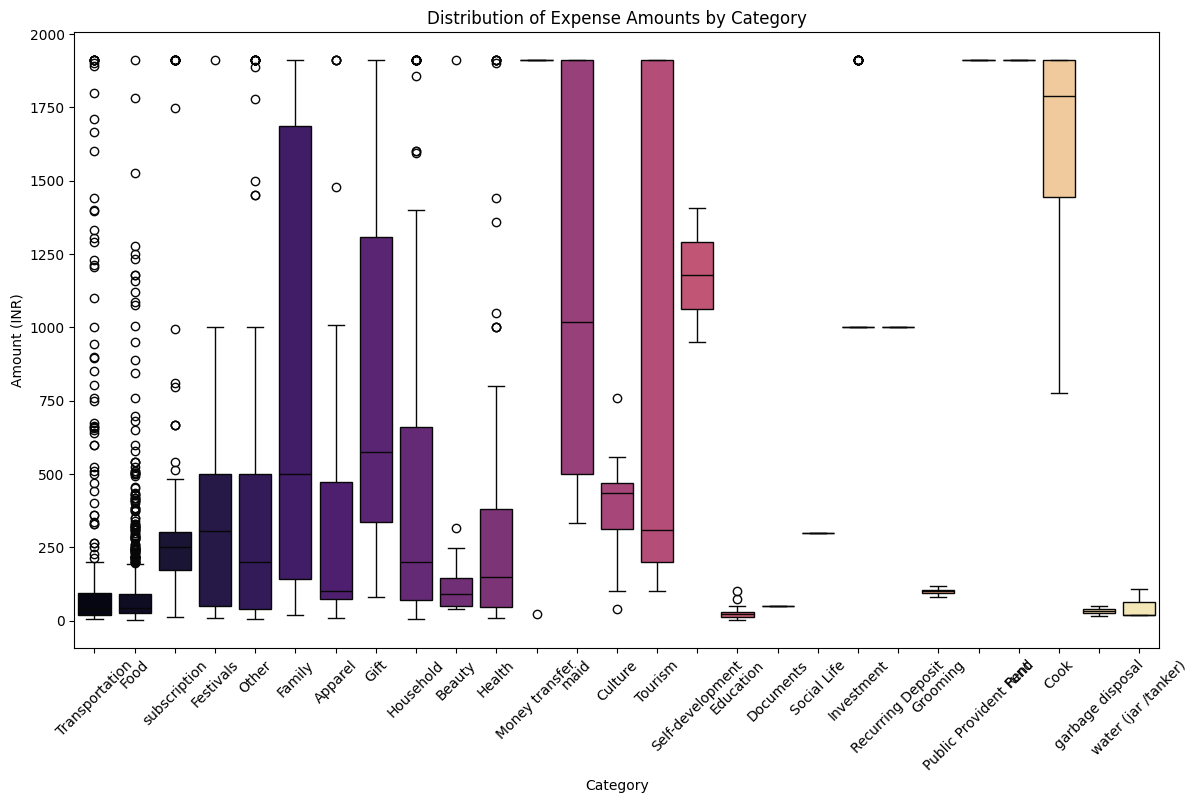


Average Expense Amount by Category for Chart.js:
                 Category       Amount
18                   Rent  1911.250000
16  Public Provident Fund  1911.250000
14         Money transfer  1867.337209
2                    Cook  1566.375000
24                   maid  1242.882353
19       Self-development  1178.500000
13             Investment  1135.334158
17      Recurring Deposit  1000.000000
21                Tourism   886.270000
9                    Gift   842.966667
6                  Family   798.288028
12              Household   494.643920
25           subscription   489.031399
15                  Other   457.618684
7               Festivals   426.453125
0                 Apparel   410.400426
3                 Culture   391.305455
11                 Health   370.002660
20            Social Life   298.000000
22         Transportation   218.842418
1                  Beauty   186.375000
8                    Food   105.937403
10               Grooming   100.000000
4             

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway

# Load the cleaned dataset
df = pd.read_csv('cleaned_daily_transactions.csv')

# Convert Date to datetime (for potential time-based analysis)
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Step 1: Descriptive Statistics by Category
category_stats = df.groupby('Category')['Amount'].describe()
print("Descriptive Statistics of Amount by Category:")
print(category_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']])

# Step 2: Boxplot of Amount by Category
plt.figure(figsize=(14, 8))
sns.boxplot(x='Category', y='Amount', data=df, palette='viridis')
plt.title('Distribution of Transaction Amounts by Category')
plt.xlabel('Category')
plt.ylabel('Amount (INR)')
plt.xticks(rotation=45)
plt.savefig('amount_by_category_boxplot.png')
plt.show()

# Step 3: ANOVA Test for Amount across Categories
# Group Amounts by Category
category_groups = [df[df['Category'] == cat]['Amount'] for cat in df['Category'].unique()]
f_stat, p_value = f_oneway(*category_groups)
print(f"\nANOVA Test for Amount across Categories:")
print(f"F-statistic: {f_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Significant difference in Amount across Categories (p < 0.05)")
else:
    print("No significant difference in Amount across Categories (p >= 0.05)")

# Step 4: Analyze Amount by Category and Income/Expense
# Boxplot for Expenses only
expense_df = df[df['Income/Expense'] == 'Expense']
plt.figure(figsize=(14, 8))
sns.boxplot(x='Category', y='Amount', data=expense_df, palette='magma')
plt.title('Distribution of Expense Amounts by Category')
plt.xlabel('Category')
plt.ylabel('Amount (INR)')
plt.xticks(rotation=45)
plt.savefig('expense_amount_by_category_boxplot.png')
plt.show()

# Step 5: Prepare Data for Chart.js (Average Amount by Category for Expenses)
avg_amount_by_category = expense_df.groupby('Category')['Amount'].mean().reset_index()
avg_amount_by_category = avg_amount_by_category.sort_values('Amount', ascending=False)
print("\nAverage Expense Amount by Category for Chart.js:")
print(avg_amount_by_category)

# Save the DataFrame for further analysis
df.to_csv('analyzed_transactions_category_amount.csv', index=False)

Okay, let's analyze the output of the correlation analysis:

- **Descriptive Statistics of Amount by Category:** This table provides summary statistics (count, mean, standard deviation, min, 25th percentile, median, 75th percentile, and max) for transaction amounts within each category. This allows for a quick comparison of the typical transaction size and variability across different categories. For example, categories like **'Food' and 'Transportation' have a high transaction count but relatively low mean amounts**, while categories like **'Rent', 'Public Provident Fund', and 'Money transfer' have much higher mean amounts**. The high standard deviations in many categories indicate a wide range of transaction amounts within those categories.
- **Boxplot of Transaction Amounts by Category:** This boxplot visually represents the distribution of transaction amounts for each category. The box shows the interquartile range (IQR), with the median marked as a line inside the box. The "whiskers" extend to 1.5 times the IQR from the quartiles, and points beyond the whiskers are considered outliers. This plot clearly shows the differences in the median amount, spread, and presence of outliers across categories. **Categories like 'Food' and 'Transportation' show tight distributions** with many small transactions, while others like **'Investment' and various 'Mutual Funds' have much wider distributions and higher median amounts**.
- **ANOVA Test for Amount across Categories:** The ANOVA test (Analysis of Variance) was performed to statistically determine if there is a significant difference in the mean transaction amount across different categories. The output shows a very small p-value (0.0000), which is much less than the typical significance level of 0.05. This indicates that there is a **significant difference in the mean transaction amount across the different categories**. This confirms what we observed visually in the boxplot and descriptive statistics – the average transaction amount is not the same for all categories.
- **Boxplot of Expense Amounts by Category:** The boxplot reveals distinct spending patterns across categories. *'Food' and 'Transportation'* show many **small, consistent expenses**. *'Subscription' and 'Household'* have slightly **more variable smaller expenses**. Categories like *'Investment', 'Public Provident Fund', and 'Money Transfer'* primarily involve large, uniform transactions near the **capped maximum**. *'Family', 'Gift', 'Apparel', and 'Health'* exhibit **wider spending ranges with notable outliers**, indicating diverse transaction amounts. Overall, the plot effectively highlights how typical expense amounts vary significantly depending on the category, with **daily necessities being small and investments/transfers being large**.
- **Average Expense Amount by Category:** This table provides the calculated average expense amount for each category, sorted from highest to lowest average. This is a useful summary to quickly identify the expense categories with the highest average spending. **'Rent', 'Public Provident Fund', and 'Money transfer' have the highest average expense amounts**, which aligns with the expectation that these categories often involve larger transactions.

##**7. Generate Report**

Here is a summary of the key findings and visualizations from the analysis:

#### **Data Cleaning**
The dataset was successfully **loaded and cleaned**. Missing values in **'Subcategory' and 'Note'** were handled, data types were corrected, and **duplicates were removed**. The **'Date' column was standardized** and converted to datetime objects, allowing for time-series analysis. **Outliers in the 'Amount' column were capped** to a reasonable range.

#### **Exploratory Data Analysis (EDA)**
*   **Summary Statistics:** The analysis of the 'Amount' column revealed a right-skewed distribution with many small transactions and fewer larger ones. The **median (100 INR) is a better indicator of typical transaction size** than the mean (469.83 INR) due to this skew.
*   **Distribution of Transaction Amounts:** The histogram visually confirmed the right-skewed distribution, with a **peak around 0-200 INR** and smaller peaks for larger amounts.
*   **Transaction Counts by Category:** **'Food' and 'Transportation' are the most frequent transaction categories**, highlighting their importance in daily household spending.
*   **Transaction Counts by Income/Expense:** The majority of transactions are **expenses**, which is expected in a daily household transaction log.
*   **Transaction Counts by Category and Income/Expense:** This stacked bar chart showed that categories like **'Food' and 'Transportation' are primarily expenses**, while **'Salary' and 'From Family' are income**. Other categories like 'Mutual Funds' and 'Small Cap fund' show a mix of income and transfers.

#### **Time Series Analysis**
*   **Daily and Monthly Trends:** Both daily and monthly plots show **significant fluctuations** in transaction amounts and counts. Expenses are consistently higher than income and transfers. There's a **noticeable increase in transaction frequency and amounts from 2017 onwards**.
*   **Weekly Expenses:** The weekly expenses plot reveals considerable **week-to-week variability in spending**.

#### **Correlation Analysis**
*   **Amount by Category:** Descriptive statistics and the boxplot of transaction amounts by category clearly show that **transaction amounts vary significantly across different categories**. Categories like 'Food' and 'Transportation' have lower typical amounts, while 'Investment', 'Public Provident Fund', and 'Money Transfer' involve larger amounts.
*   **ANOVA Test:** The ANOVA test confirmed a **significant statistical difference in the mean transaction amount across categories** (p-value < 0.05).
*   **Expense Amount by Category:** The boxplot of expense amounts by category further detailed spending patterns, showing that **daily necessities have smaller expenses** and investments/transfers have larger ones (within the capped range).

This analysis provides valuable insights into the spending and income patterns recorded in the daily household transactions dataset.
